# Are we what we tweet?
Nadine Ruecker <br>
Final Capstone Thinkful <br>
March - April 2019
## Introduction
Overweight and obesity are complex health issues. They are affected by genetics, behavior and society. Eating patterns, exercise moral and even use of medication, seem to be voluntary choices. Nevertheless, studies have shown that these choices are not entirely freely made, but are impacted by the social environment, especially in regards to eating and exercise habits, education and the reactions to advertisement and marketing strategies. Obesity causes an enormous financial burden on the health care system, as it is associated with many other diseases like diabetes, diseases of the coronary system (heart disease and hypertension), mental illness, osteoarthritis and even some forms of cancer. Furthermore, the overall productivity is impacted by an increased rate of absenteeism (being absent) and presenteeism (being present but unproductive) at work, and earlier onsets of disabilities(https://www.cdc.gov/obesity/adult/causes.html). In 2016, 64.8% of adults in the US were reported to be overweight. <br>
In this project, I would like to explore if signs of healthy and unhealthy population behavior can be observed in twitter data. I would like to explore the following two questions: <br>
1. Can the number of tweets in different categories predict health outcomes? <br>
2. Is the language between tweets mentioning healthy behavior different then tweets mentioning unhealthy behavior?
## Hypothesis
How many people are having a burger? How often do they go to a healthy restaurant? Who is sitting on the couch watching TV and who is exercising? <br>
Twitter generates an enormous amount of behavioral data in form of tweets, retweets, followers and likes. But can this data be representative of the population? My hypothesis is that tweet content reflects the eating and exercise behavior of the average population per State. I would like to predict how healthy the population of a certain US State is, without using data generated by health institutions (hospitals, insurances, central data collections), but rather using tweets. 
## Data
The project is based two independent data sets: Health indicators and features engineered using scraped tweets.
### Health indicating data
The data on health indicators originates from here (https://www.kff.org/). I collected data for the years 2013-2016, for these indicators: Diabetes rate, ER visits, hospital stays, inpatient days, obesity rates and self-estimated health, with values for each US State. For the modeling these indicators will be combined into the output variable Combi_Indi (combined indicators) and further converted into a categorical variable ('Health_Cat'). High values of Combi_Indi indicate bad health outcomes ( high obesity rates, high hospitals stays...). Health_Cat classifies the Combi_Indi values in 4 categories. A; very good (below -0.5), B good (-0.5 - 0), C: bad (0-0.5) and D: very bad (0.5<).
### Tweet data - Initial results
To classify tweets into healthy and unhealthy behavior, I did a preliminary analysis scraping tweets using the standard twitter API with tweepy as wrapper. I sampled 2000 tweets for around 200 queries, covering topics of healthy and unhealthy activities, food and resturants(https://github.com/NaRuecker/Final-Capstone/blob/master/Tweepy%20Extraction%20and%20Location%20determination%20-%20NoKeys.ipynb). 17-20% of tweets can be located to a US State using the location that a user saved in the user profile. The US based tweets were then group by the query and summarized into counts for each US State (e.g. 20 tweets mentioning yoga in NY). Tweet counts were then normalized to unequal sampling and population size of the respective State. A first preliminary analysis revealed, that the normalized counts have no correlation with the outcome variable. Only ratios between unhealthy and health tweet counts correlated with the outcome. However, this was only true for tweet ratios of food-queries. Activity and restaurants count ratios did not have any correlation to the health indicators.
![TweetCountCorrelation](Combi_Health correlation.png)
Therefore, I did not pursue activities and restaurants any further.
### Historical tweet data - Constraints and work arounds
Historical data (beyond the past 7 days) is not accessible using the standard twitter API. In order to scrape tweets matching the health data for the years 2013-2016, I had two options: Using the twitter premium API or finding a web scraping workaround possibly through the advanced tweet search. <br> A twitter premium account is costly: Prices start at $399/month, which allows full archive access. But even the premium account is limited to 500 requests/month. The maximum number of tweets returned per request are 500 tweets. As I was aiming to scrape ~100 queries for 4 years of data each returning at least 2000 tweets, I would have needed (2000*100*4=800.000/500) 1600 requests. The premium API was not an option for this project. <br>
Finally, I decided to use the twint package to access historic data, without authentication and rate limits. Now, the limit was that in order to access the user’s location, I could not use twint as the User data call did not work for me (Windows operating system related issues https://github.com/twintproject/twint/issues/384). So I scarped the tweets using twint (https://github.com/NaRuecker/Final-Capstone/blob/master/TwintHistoricTweets.ipynb) and then looked up the user ID using the standard twitter API (https://github.com/NaRuecker/Final-Capstone/blob/master/Tweepy%20Extraction%20and%20Location%20determination%20-%20noKeys.ipynb).


## Analysis and Results
### Can tweet counts in diverse categories predict health outcomes?
I tried three different general approaches to predict the Combi_Indi:
1. Normalized tweet counts per query, summarized using pca.
2. Normalized tweet count ratios combined with regional data and summarized using pca.
3. Features that were most correlated with the outcome variable. <br>
First, I tried to use the normalized tweet counts for each query, combined the shared variance observed using PCA and used the top 10 generated features as input into divers models. I performed a gridsearch for each model, but the modeling scores were disappointing. <br>
As the single query counts were too noisy to have any predictive value, I summarized them into healthy and unhealthy total counts. I also calculated a ratio of unhealthy over healthy normalized counts (UnH_ratio). To further categorize the States, I added regional and divisional data (https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States). As seen in the maps below, there are clear trends for the west coast or for example the southern States.
![TwoMaps](Two_Maps.png)
As there was some collinearity between the different divisions and regions, I used PCA to combine features (see next figure A). The top 2 components explained more than 99% variance (B). Both components showed a decent amount of correlation with the outcome feature (C).
![CorrMa and pcas](CorrMa_Pcas.png)
I used the two components as input features for several models. All models were run using a grid search to optimize their parameters and a 4-fold cross validation. The resulting R^2 values still showed high standard variations and partially negative values. 
![PCA Modeling Results](PcaModel.JPG)
Surprisingly, the best model results were achieved, when using the 8 features with the highest correlation to the outcome variable:'UnH_ratio','Region_South','Region_West','Division_EastSouthCentral','Division_Mountain','Division_Pacific',
'Division_WestSouthCentral','Division_NewEngland'.
![Handselected Features Modeling Results](HandSelectedModel.JPG)
I further tried to optimize the modeling using neural networks with sklearn and keras, but even in combination with grid search the resulting R^2 were negative or close to zero. The extremely bad performance of neural networks is probably due to the small size of the dataset (180 datapoints ~ 8 features).


### Is the language between tweets mentioning healthy behavior different then tweets mentioning unhealthy behavior?
In the first part of the project, I analyzed the occurrence of queries in tweets and classified them into 'healthy' und 'unhealthy' based on the search query. Per query I scraped around 8000 tweets (2000 per year), but for the NLP analysis I only kept the tweets that could be located to a US State. Tweets with the same text were removed, in order tp reduce the impact of retweets. So actually, less than 1500 tweets per query remained. I was not sure if this would be enough and unbiased enough to build a good training set for natural language processing approach differentiating healthy and unhealthy tweets.<br>
After generating tfidfmatrix and performing latent semantics analysis, it became clear, that the data I collected could be classified to some extent by the queries I had chosen.
![TweetsExamples](LSAs.png)
In order to determine the general category of a tweet (unhealthy or healthy), I decided to use NLP. I used three different methods of feature generation: 
1. tfidf followed svd for latent semantics analysis
2. tfidf followed by latent dirichlet allocation
3. tfidf followed by non-negative matrix factorization
From each method I used the top 300 features as input into 6 different models, all with gridsearch for parameter optimization and 3 fold cross validation.
Best results were achieved using the tfidf-lsa data. Scores ranges in the high 0.9, with small standard deviations. The similarities found in the tweets are interestingly distinct from the features I generated using the queries.
![Tfidf-svdModel data](Tfidf-svd-Model.png)
The NLP scripts can be found here(https://github.com/NaRuecker/Final-Capstone/blob/master/Final_Capstone_NLP_Model.ipynb).

### Predicting Health_Cat using tweet language attributes.
When trying to predict the absolute value of Combi_Ind using tweet counts be category the models had high MSE and very variable scores. I attribute this in particular to the size of the dataset (188, 8). This motivated me to try a different approach: First I converted the Combi_Id into a new categorical feature 'Health_Cat' with 4 different categories: A (very good health indicator values), B (good health indicator values), C(bad indicator values) and D (very bad health indicator values). 
![Combi_Indi_Hist](Combi_Id_Hist.png)
I joined the health categorical data together with the regional data with the lsa data. Now instead of having one datapoint per year and State, I had thousands of tweets representing each health_indicator measurement per year and State. As the classes were unbalanced, I decided to down sample the dataset, so that the category with the lowest number of tweets (A) determined the total number of tweets used from each category. This still resulted in a much bigger dataset (11820,363).<br>
I tried several models to predict the 4 categories, each with 3 fold cross validation and gridsearch to optimize the models parameters. The strongest performance resulted from K-nearest neighbor with an accuracy of 0.948 and as the confusing matrix below indicates it had excellent precision for all 4 categories.
![Classification Results](Class_Results.png)
The script can be found here(https://github.com/NaRuecker/Final-Capstone/blob/master/Classification%20of%20Combi_Indi.ipynb)
## Value and perspectives
My analysis demonstrates that tweet data can be used to predict health indicators. Obesity and diabetes rates measured today, are the results of unhealthy behavior from the past. Only after long-term unhealthy behavior, diseases like obesity and diabetes will manifest. However, as my analysis indicates; future obesity rates, can be monitored right now, by analyzing the populations behavior using tweets.br>
My analysis in its current state could be optimized in many ways: With a greater number of tweets and a longer time period studied, the predictions can probably be refined. Once enough data is gathered (probably at least a decade worth of data) it should also be considered doing a timeseries analysis. As I stated earlier the past behavior influences the current health indicators.<br>
The way I imagine the use of this data science tool is however to monitor more refined behavior. For example, if the State of Mississippi would roll out a campaign to improve people's eating behavior by visiting schools for example. Would there be a measurable effect in the tweets content? Could a whole generation be impacted, when influencers would start to promote healthy eating behavior? These are questions that this data science tool can answer.


## Data Prep

In [108]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import glob, os
from collections import Counter

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from plotnine import *
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

# PCA
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [109]:
States_dict={'Alabama' : 'AL','Alaska' : 'AK','Arizona' : 'AZ','Arkansas' : 'AR','California': 'CA','Colorado' : 'CO',
             'Connecticut' : 'CT','Delaware' : 'DE','District of columbia':'DC','Florida' : 'FL','Georgia' : 'GA','Hawaii' : 'HI','Idaho' : 'ID',
             'Illinois' : 'IL','Indiana' : 'IN','Iowa' : 'IA', 'Kansas' : 'KS','Kentucky' : 'KY','Louisiana' : 'LA','Maine':'ME',
             'Maryland' : 'MD','Massachusetts': 'MA' ,'Michigan' : 'MI','Minnesota' : 'MN', 'Mississippi' : 'MS','Missouri' : 'MO',
             'Montana' : 'MT','Nebraska' : 'NE','Nevada' : 'NV','New hampshire' : 'NH','New jersey' : 'NJ','New mexico' : 'NM',
             'New york' : 'NY', 'North carolina' : 'NC','North dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK','Oregon' : 'OR',
             'Pennsylvania' : 'PA', 'Rhode island' : 'RI','South carolina' : 'SC','South dakota' : 'SD','Tennessee' : 'TN',
             'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA','Washington' : 'WA', 'West virginia' : 'WV',
             'Wisconsin' :'WI', 'Wyoming':'WY'}
print(len(States_dict))

51


In [110]:
# Combine the current tweet data
df= pd.read_csv('USonly_tweet_data.csv')
print(df.shape)
df=df.iloc[:,1:df.shape[1]-1] #Remove a weird column
df=df[(df['Cat']=='HealthyFood') | (df['Cat']=='UnhealthyFood')]
df.head()

(163532, 7)


,Cat,Year,Query,State,tweet
0,HealthyFood,2013,apple,il,apple crates @virtuecider http://instagram.co...
1,HealthyFood,2013,apple,fl,"Samsung outguns Apple in marketing, report say..."
2,HealthyFood,2013,apple,tx,Apple Makes Its Accounts More Secure http://b...
3,HealthyFood,2013,apple,ut,@perezcommajamie I do use Zune!!! It's the pro...
4,HealthyFood,2013,apple,ny,Very Nice Flavor â€” Drinking a Shock Top Hone...


In [111]:
# How many missing values
# Missing values are generated when tweets contain certain spacing
print('Before dropping NA, df shape:',df.shape)
print('How much data is missing:')
print(df.isnull().sum())
# if the row has any NA, drop it
df=df.dropna(axis=0,how='any')
df=df.reset_index()
df=df.drop('index',axis=1)
print('After dropping NA, df shape:',df.shape)
print(df.isnull().sum())

Before dropping NA, df shape: (163532, 5)
How much data is missing:
Cat        0
Year       0
Query      0
State    122
tweet      0
dtype: int64
After dropping NA, df shape: (163410, 5)
Cat      0
Year     0
Query    0
State    0
tweet    0
dtype: int64


In [112]:
# Adding a more general category
General=df['Cat'].str.split('y',n = 1, expand = True)
df['General']=General[0]+'y'
df.head()

,Cat,Year,Query,State,tweet,General
0,HealthyFood,2013,apple,il,apple crates @virtuecider http://instagram.co...,Healthy
1,HealthyFood,2013,apple,fl,"Samsung outguns Apple in marketing, report say...",Healthy
2,HealthyFood,2013,apple,tx,Apple Makes Its Accounts More Secure http://b...,Healthy
3,HealthyFood,2013,apple,ut,@perezcommajamie I do use Zune!!! It's the pro...,Healthy
4,HealthyFood,2013,apple,ny,Very Nice Flavor â€” Drinking a Shock Top Hone...,Healthy


In [113]:
#How many queries remain
print('Remaining number of queries:',len(df['Query'].unique()))
print()
# How many healthy and unhealthy tweets remain
print('How many healthy and unhealthy tweets remain?')
print(df['Cat'].value_counts())
print()

Remaining number of queries: 85

How many healthy and unhealthy tweets remain?
HealthyFood      121563
UnhealthyFood     41847
Name: Cat, dtype: int64



In [114]:
# Let's count how many tweets there were on healthy and unhealthy subjects
t_data_counts=df.groupby(['State', 'General','Year']).count()
t_data_counts=t_data_counts['tweet'].reset_index()
t_data_counts=t_data_counts.pivot_table(index=['State','Year'], columns='General',values='tweet').reset_index()


#Replace all NA with 0
Count_data=t_data_counts.fillna(0)
Count_data.head()

General,State,Year,Healthy,Unhealthy
0,ak,2013,33,8
1,ak,2014,54,20
2,ak,2015,36,14
3,ak,2016,55,28
4,ak,2017,60,27


In [115]:
#Getting the health data
H_data=pd.read_csv("HealthData.csv")

# Add Two letter state code to health data
H_data['State1']=H_data['State'].str.capitalize()
H_data['StateCode']=[States_dict[x] for x in H_data['State1']]
H_data['StateCode']=H_data['StateCode'].str.lower()
H_d=H_data.drop('State1',axis=1)
H_d.head()

,Year,State,aa_Diabetes_DeathRate,aa_HeartDisease_DeathRate,Diabetes_diagnosed,ERvisits,HospStays,InpatDays,Adult Overweight/Obesity Rate,Adults Reporting Fair or Poor Health Status,StateCode
0,2013,Alabama,24.3,228.4,0.138,472,133,697,0.682,0.228,al
1,2013,Alaska,20.1,135.0,0.071,350,78,512,0.661,0.150,ak
2,2013,Arizona,23.5,141.1,0.107,312,96,436,0.618,0.167,az
3,2013,Arkansas,24.2,214.1,0.115,486,119,614,0.699,0.241,ar
4,2013,California,20.6,151.8,0.102,315,85,430,0.601,0.189,ca


In [116]:
# Let's combine the health indicators into one major health indicator
from sklearn.preprocessing import StandardScaler
normalizedHIs=StandardScaler().fit_transform(H_d.drop(['Year','State','StateCode'], axis=1))# calculating z-scores

# normalize Combi_Health so that 
CombiHealthIndi=np.sum(normalizedHIs, axis=1)
MAX=max(CombiHealthIndi)

# The higher the Combi Indicator the unhealthier the State
H_d['Combi_Indi']=CombiHealthIndi/MAX
H_d.head()

,Year,State,aa_Diabetes_DeathRate,aa_HeartDisease_DeathRate,Diabetes_diagnosed,ERvisits,HospStays,InpatDays,Adult Overweight/Obesity Rate,Adults Reporting Fair or Poor Health Status,StateCode,Combi_Indi
0,2013,Alabama,24.3,228.4,0.138,472,133,697,0.682,0.228,al,0.599171
1,2013,Alaska,20.1,135.0,0.071,350,78,512,0.661,0.150,ak,-0.409322
2,2013,Arizona,23.5,141.1,0.107,312,96,436,0.618,0.167,az,-0.257929
3,2013,Arkansas,24.2,214.1,0.115,486,119,614,0.699,0.241,ar,0.476592
4,2013,California,20.6,151.8,0.102,315,85,430,0.601,0.189,ca,-0.319091


In [117]:
# Preparing the population data
Pop_data=pd.read_csv("USA_Pop1.csv")

# lowering the State name in the popdata
Pop_data['StateCode']=Pop_data['State'].str.lower()
Pop_data=Pop_data.drop('State',axis=1)

# add the population data
H_d= pd.merge(H_d,Pop_data,on=['StateCode'])
# convert State to lower case
H_d['StateCode']=H_d['StateCode'].str.lower()
H_d.head()

# Add the tweet counts to the health data
data=pd.merge(H_d,Count_data,left_on=['StateCode','Year'],right_on=['State','Year'])

# Now we have to again fill in NA with 0
data=data.fillna(0)
data.head()

,Year,State_x,aa_Diabetes_DeathRate,aa_HeartDisease_DeathRate,Diabetes_diagnosed,ERvisits,HospStays,InpatDays,Adult Overweight/Obesity Rate,Adults Reporting Fair or Poor Health Status,StateCode,Combi_Indi,part of the total U.S. pop,Region,Division,State_y,Healthy,Unhealthy
0,2013,Alabama,24.3,228.4,0.138,472,133,697,0.682,0.228,al,0.599171,0.0148,South,EastSouthCentral,al,234,68
1,2014,Alabama,22.8,224.0,0.129,484,130,688,0.670,0.229,al,0.510582,0.0148,South,EastSouthCentral,al,256,90
2,2015,Alabama,21.7,229.7,0.135,508,127,704,0.687,0.222,al,0.559005,0.0148,South,EastSouthCentral,al,267,76
3,2016,Alabama,20.1,222.5,0.146,453,130,731,0.695,0.226,al,0.560150,0.0148,South,EastSouthCentral,al,253,136
4,2013,Alaska,20.1,135.0,0.071,350,78,512,0.661,0.150,ak,-0.409322,0.0022,West,Pacific,ak,33,8


In [118]:
# Are there any missing values?
data.isnull().sum()

Year                                           0
State_x                                        0
aa_Diabetes_DeathRate                          0
aa_HeartDisease_DeathRate                      0
Diabetes_diagnosed                             0
ERvisits                                       0
HospStays                                      0
InpatDays                                      0
Adult Overweight/Obesity Rate                  0
Adults Reporting Fair or Poor Health Status    0
StateCode                                      0
Combi_Indi                                     0
part of the total U.S. pop                     0
Region                                         0
Division                                       0
State_y                                        0
Healthy                                        0
Unhealthy                                      0
dtype: int64

In [119]:
# Getting the tweet data into shape
# I need to normalize for 2 things:
# 1. Unequal tweet counts (120k Healthy, 40k Unhealthy)
# 2. Population of the State

# But before I can do that I will add 1 pseudocount to all, so that I avoid deviding by zero
CountColumns=['Healthy','Unhealthy']
data[CountColumns]=data[CountColumns]+1

# 1.Unequal tweet counts in the different categories
# I did not scrape the exact same number of tweets per category(healthy unhealthy).
# To correct for that I will multiply the healthy tweets by the ratio unhealthy/healthy
h_tweet_count=df['General'].value_counts().sort_index()[0]
uh_tweet_count=df['General'].value_counts().sort_index()[1]
print('Total number of healthy tweets collected:',h_tweet_count)
print('Total number of unhealthy tweets collected:',uh_tweet_count)
uh_h_ratio=uh_tweet_count/h_tweet_count
# Now multiply the healthy counts with the unhealthy_healthy ratio
data['Healthy'] =data['Healthy']*uh_h_ratio

#2. Normalize the tweet number by population percentage and multiply with factor
data['norm_healthy']=data['Healthy']*data['part of the total U.S. pop']
data['norm_unhealthy']=data['Unhealthy']*data['part of the total U.S. pop']

# Calculate a ratios between healthy and healthy tweets for each category
data['UnH_ratio']=data['norm_unhealthy']/data['norm_healthy']

# Let's drop the total values for Pop size and tweet counts
print(data.shape)
data1=data.drop(['part of the total U.S. pop','Healthy','Unhealthy'],axis=1)

# Fix some column naming
data1=data1.drop('State_y',axis=1)
data1= data1.rename(columns={"State_x": "State"})
print(data1.shape)

Total number of healthy tweets collected: 121563
Total number of unhealthy tweets collected: 41847
(188, 21)
(188, 17)


In [120]:
data1.head()

,Year,State,aa_Diabetes_DeathRate,aa_HeartDisease_DeathRate,Diabetes_diagnosed,ERvisits,HospStays,InpatDays,Adult Overweight/Obesity Rate,Adults Reporting Fair or Poor Health Status,StateCode,Combi_Indi,Region,Division,norm_healthy,norm_unhealthy,UnH_ratio
0,2013,Alabama,24.3,228.4,0.138,472,133,697,0.682,0.228,al,0.599171,South,EastSouthCentral,1.197271,1.0212,0.852940
1,2014,Alabama,22.8,224.0,0.129,484,130,688,0.670,0.229,al,0.510582,South,EastSouthCentral,1.309356,1.3468,1.028597
2,2015,Alabama,21.7,229.7,0.135,508,127,704,0.687,0.222,al,0.559005,South,EastSouthCentral,1.365399,1.1396,0.834628
3,2016,Alabama,20.1,222.5,0.146,453,130,731,0.695,0.226,al,0.560150,South,EastSouthCentral,1.294072,2.0276,1.566837
4,2013,Alaska,20.1,135.0,0.071,350,78,512,0.661,0.150,ak,-0.409322,West,Pacific,0.025749,0.0198,0.768955


## Exploratory data analysis

In [ ]:
# Plot the Combi_Indi and UnH_ratio on maps

In [263]:
MeanData4years=data1[['StateCode','Combi_Indi','UnH_ratio']].groupby('StateCode').mean().reset_index()
MeanData4years.head()

,StateCode,Combi_Indi,UnH_ratio
0,ak,-0.356820,1.140034
1,al,0.557227,1.070751
2,ar,0.523860,1.061205
3,az,-0.211623,0.987096
4,ca,-0.330090,0.828002


In [ ]:
MeanData4years

In [284]:
# Plot Obesity rates for the year 2016

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(29,161,242)'],
    [0.6, 'rgb(20,154,200)'],
    [0.8, 'rgb(10,107,177)'],
    [1.0, 'rgb(5,39,143)']
]

data = [ dict(
        type = 'choropleth',
        colorscale = scl,
        locations =  MeanData4years['StateCode'].str.upper(),
        z =  MeanData4years['Combi_Indi'],
        text = MeanData4years['StateCode'],
        locationmode = 'USA-states',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Combined health indicator'),
      ) ]

layout = dict(
    title = 'Combined health indicator <br> Average 2013-2016',
    geo = dict(
        showframe = False,
        showcoastlines = True,
       projection = go.layout.geo.Projection(type = 'albers usa'),
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-cloropleth-map' )

In [285]:
# Plot Obesity rates for the year 2016
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(29,161,242)'],
    [0.6, 'rgb(20,154,200)'],
    [0.8, 'rgb(10,107,177)'],
    [1.0, 'rgb(5,39,143)']
]

data = [ dict(
        type = 'choropleth',
        colorscale = scl,
        locations =  MeanData4years['StateCode'].str.upper(),
        z =  MeanData4years['UnH_ratio'],
        text = MeanData4years['StateCode'],
        locationmode = 'USA-states',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unhealthy/Healthy <br>Tweet Ratio'),
      ) ]

layout = dict(
    title = 'Unhealthy/Healthy Tweet Ratio <br> Average 2013-2016',
    geo = dict(
        showframe = False,
        showcoastlines = True,
       projection = go.layout.geo.Projection(type = 'albers usa'),
    )
)

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-cloropleth-map' )

## Univariate feature exploration

aa_Diabetes_DeathRate


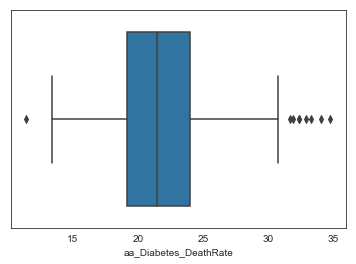

aa_HeartDisease_DeathRate


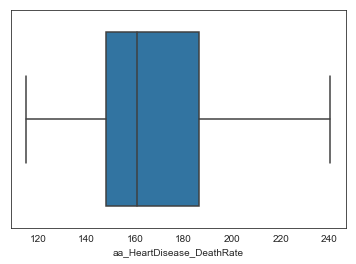

Diabetes_diagnosed


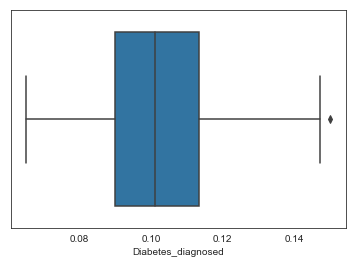

ERvisits


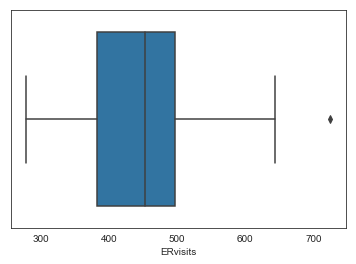

HospStays


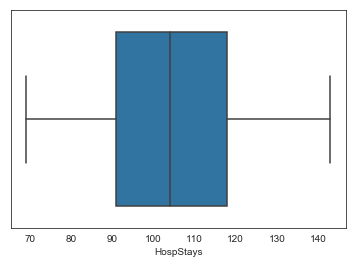

InpatDays


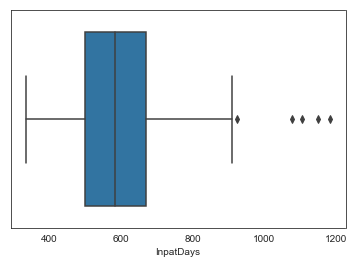

Adult Overweight/Obesity Rate


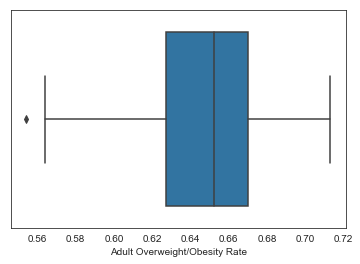

Adults Reporting Fair or Poor Health Status


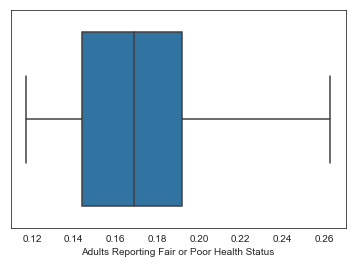

StateCode
Combi_Indi


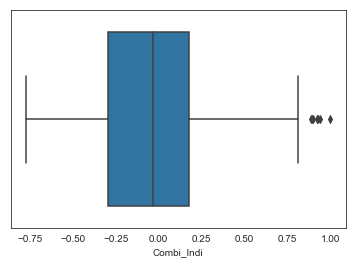

Region
Division
norm_healthy


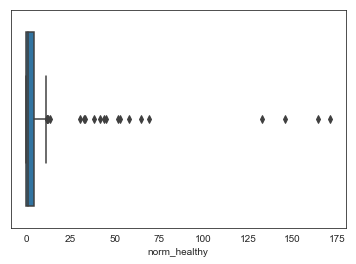

norm_unhealthy


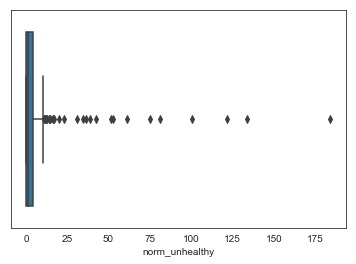

UnH_ratio


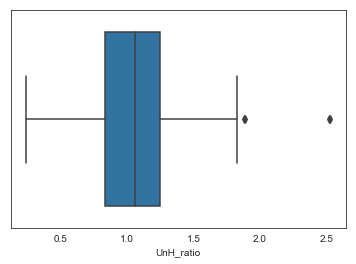

In [121]:
for c in data1.columns[2:]:
    print(c)
    try:
        sns.boxplot(data1[c])
        plt.show()
    except:
        next

In [122]:
# Removing some outliers
print(data1.shape)
data2=data1[data1['UnH_ratio']<1.75]
data2=data2[data2['Combi_Indi']<0.75]
print(data2.shape)

(188, 17)
(177, 17)


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



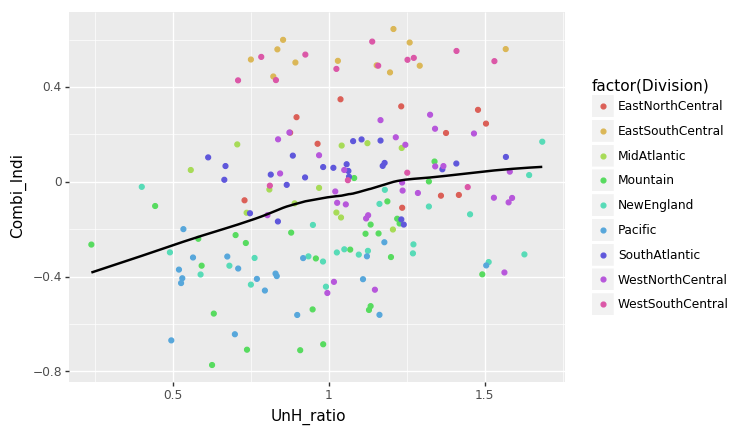

<ggplot: (95886301346)>

In [123]:
(ggplot(data2)
 + geom_point(aes(x='UnH_ratio', y='Combi_Indi', color='factor(Division)'))
 + geom_smooth(
        aes(x = 'UnH_ratio',
            y = 'Combi_Indi'))
)

In [124]:
data1[['State','Year','Combi_Indi', 'UnH_ratio','Division']].sort_values(['UnH_ratio'], ascending=False).head(10)

,State,Year,Combi_Indi,UnH_ratio,Division
187,West Virginia,2016,1.000000,2.530109,SouthAtlantic
107,Nebraska,2016,-0.126268,2.522711,WestNorthCentral
143,Oklahoma,2016,0.449265,1.890516,WestSouthCentral
95,Mississippi,2016,0.898122,1.879667,EastSouthCentral
186,West Virginia,2015,0.941541,1.829036,SouthAtlantic
133,North Dakota,2014,0.063754,1.829036,WestNorthCentral
94,Mississippi,2015,0.920539,1.779603,EastSouthCentral
74,Maine,2015,0.169401,1.684023,NewEngland
93,Mississippi,2014,0.809528,1.680543,EastSouthCentral
75,Maine,2016,0.028604,1.641922,NewEngland


In [125]:
# Remove the following outliers and reset the index
#(data2['State'] == 'New York')&(data2['Year'] == 2013)

#data2.loc[(data2['State'] == 'Texas')&(data2['Year'] == 2013)]
print(data2.shape)
data3=data2[~((data2['State'] == 'New York') & (data2['Year'] == 2013))]
data3=data3[~((data3['State'] == 'North Dakota') & (data3['Year'] == 2013))]
data3=data3[~((data3['State'] == 'Texas') & (data3['Year'] == 2013))]
print(data3.shape)

(177, 17)
(174, 17)


aa_Diabetes_DeathRate


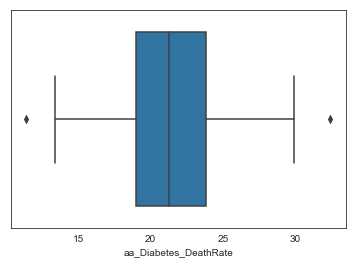

aa_HeartDisease_DeathRate


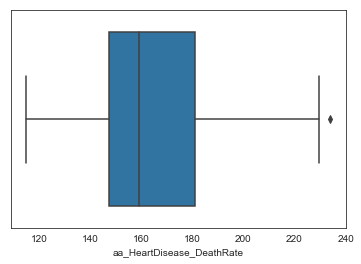

Diabetes_diagnosed


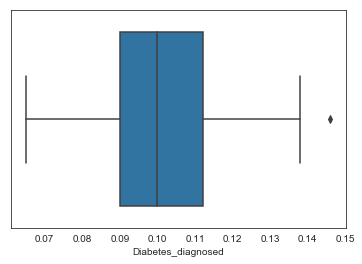

ERvisits


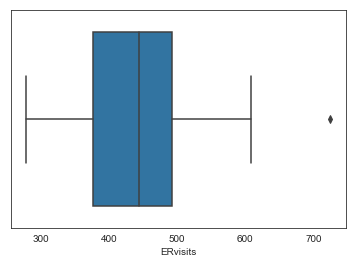

HospStays


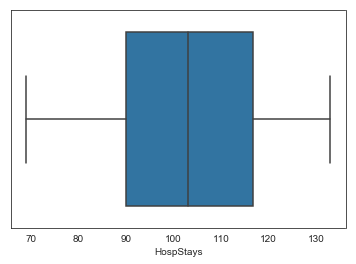

InpatDays


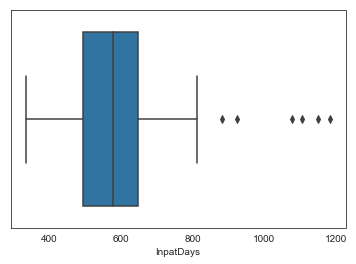

Adult Overweight/Obesity Rate


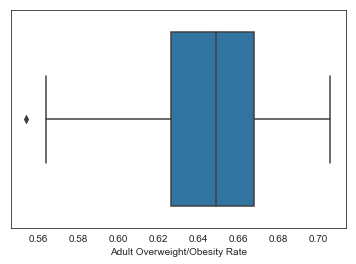

Adults Reporting Fair or Poor Health Status


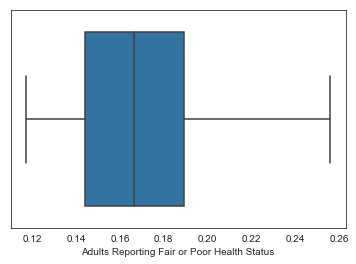

StateCode
Combi_Indi


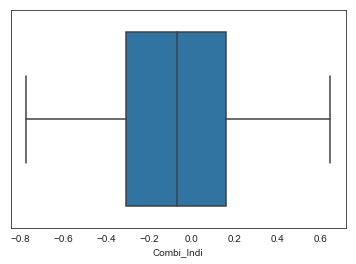

Region
Division
norm_healthy


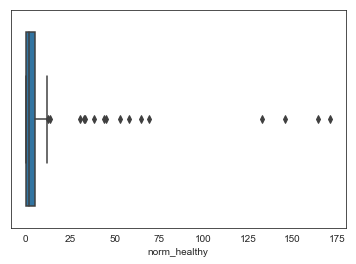

norm_unhealthy


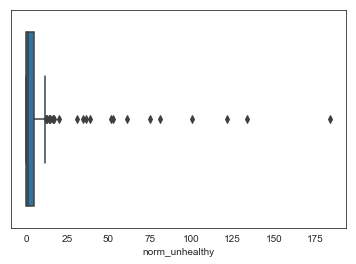

UnH_ratio


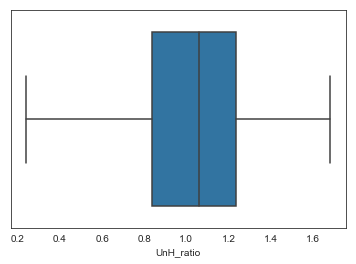

In [126]:
for c in data3.columns[2:]:
    print(c)
    try:
        sns.boxplot(data3[c])
        plt.show()
    except:
        next

## Correlation of features

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\matplotlib\legend.py:445: UserWarning:

The handle <matplotlib.patches.Patch object at 0x000001653B4B5FD0> has a label of '_nolegend_' which cannot be automatically added to the legend.



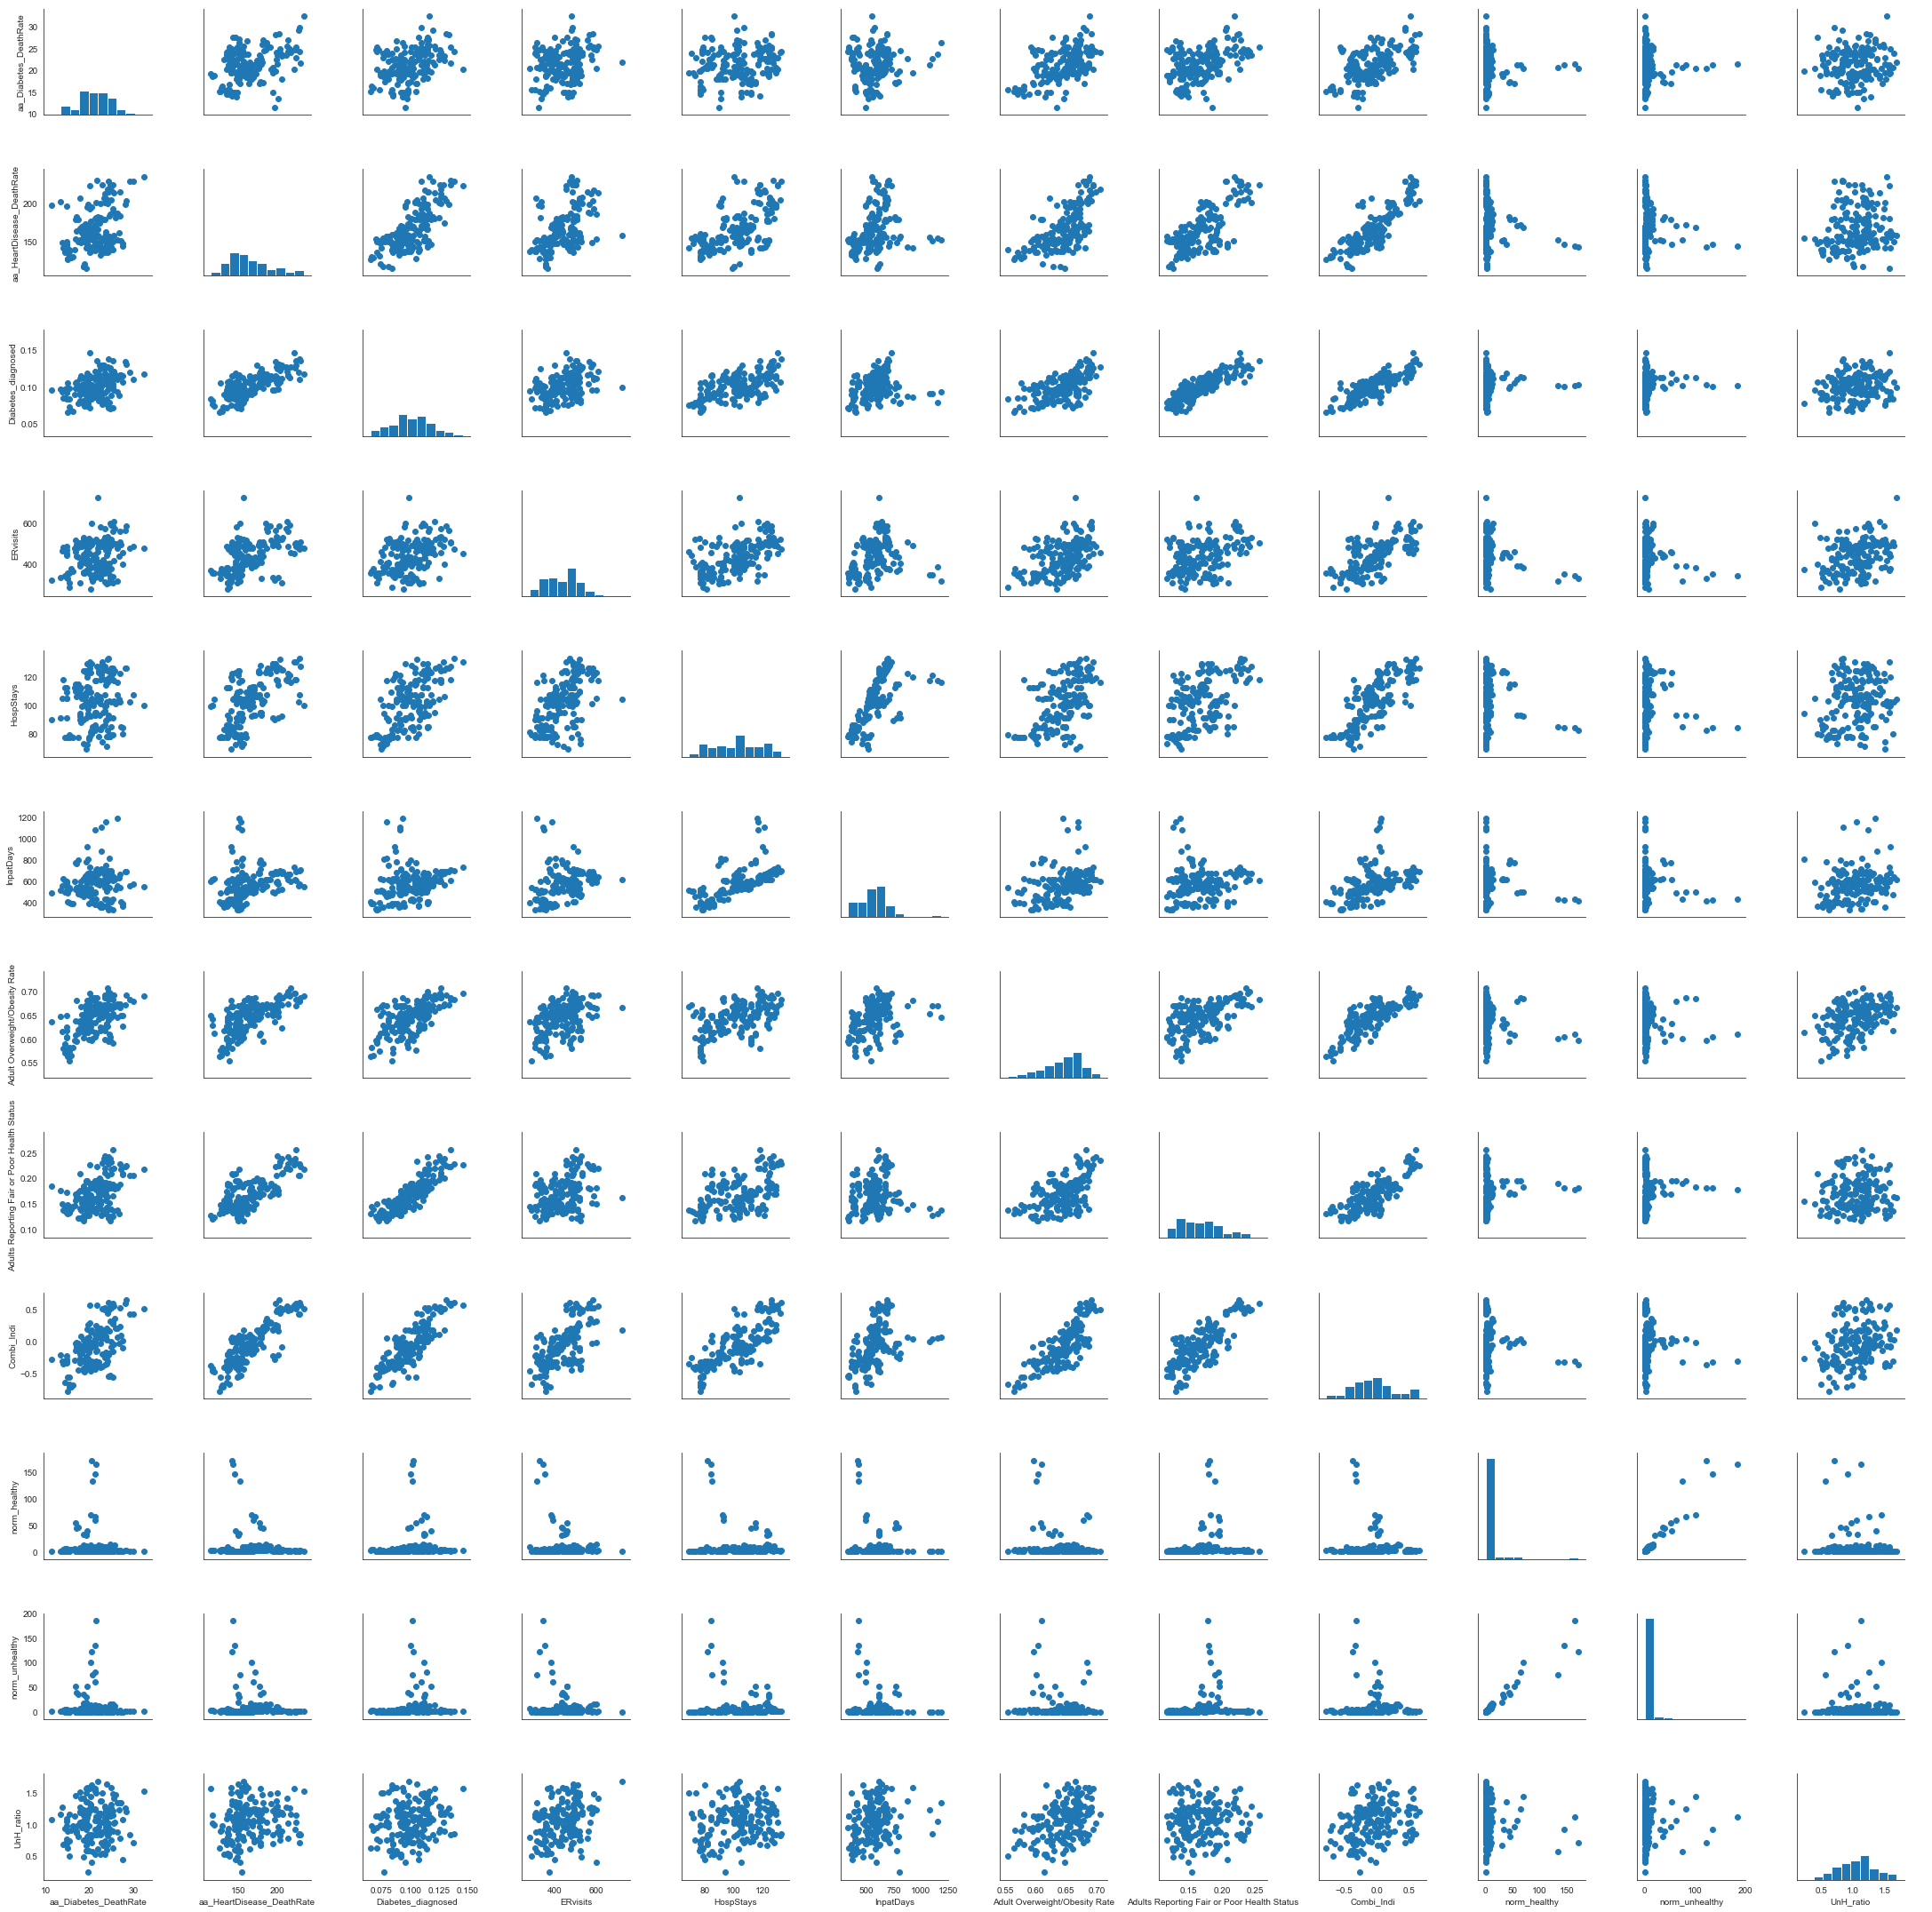

In [127]:
# Okay let's finally have a look at the data relationships

# Let's use a bivariate comparison and look at histogram to detect outliers and at correlation between featuters
corrdat=data3.drop(['Year','State','Region', 'Division'], axis=1)
g = sns.PairGrid(corrdat)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

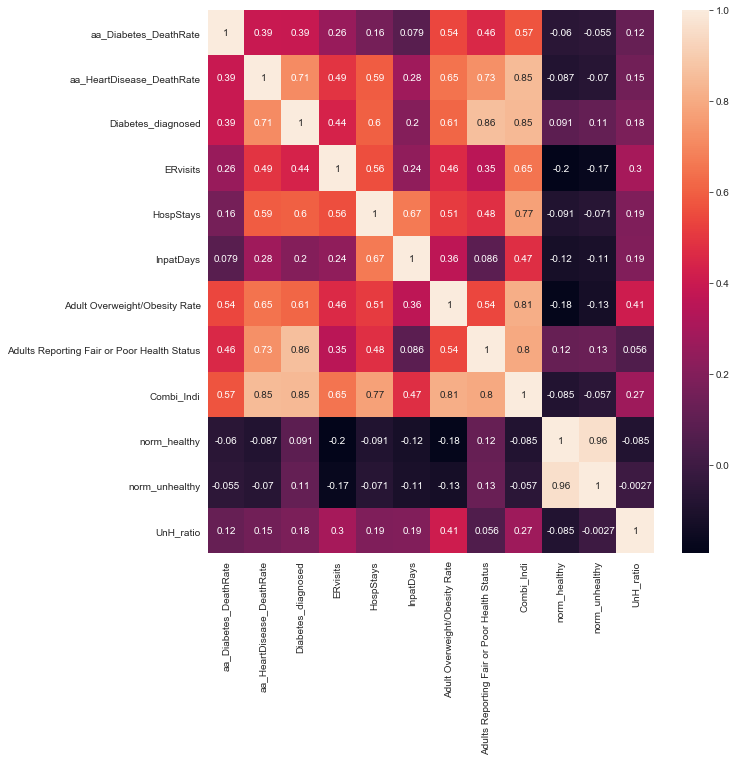

In [128]:
CorrMa = corrdat.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(CorrMa,annot=True)#[['norm_healthy_tweets','norm_unhealthy_tweets']])
plt.show()

There is pretty good correlation for the individual data sets: Between the health indicators and between the normalized tweet counts. Only when calculating the unhealthy_healthy tweet ratio, there is good correlation between the health indicators and the tweets counts. <br>
Therefore, I will do the following:
1. Use Combi_Indi as one main health indicator.<br>
2. Drop all the norm_tweet counts.
3. Keep the Unhealthy_healthy_ratio.

## Clustering
Maybe clustering will shed a new perspective on the data.

In [129]:
# let's convert division and region into binary data
Catdata=data3[['Division','Region']]
DummyData=pd.get_dummies(Catdata)
df4=pd.concat([data3[['UnH_ratio','Combi_Indi','Year']],DummyData],axis=1)
df4['Region']=data3['Region']
df4['Division']=data3['Division']

In [130]:
df4.head()

,UnH_ratio,Combi_Indi,Year,Division_EastNorthCentral,Division_EastSouthCentral,Division_MidAtlantic,Division_Mountain,Division_NewEngland,Division_Pacific,Division_SouthAtlantic,Division_WestNorthCentral,Division_WestSouthCentral,Region_Midwest,Region_Northeast,Region_South,Region_West,Region,Division
0,0.852940,0.599171,2013,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral
1,1.028597,0.510582,2014,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral
2,0.834628,0.559005,2015,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral
3,1.566837,0.560150,2016,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral
4,0.768955,-0.409322,2013,0,0,0,0,0,1,0,0,0,0,0,0,1,West,Pacific


In [131]:
df4.shape

(174, 18)

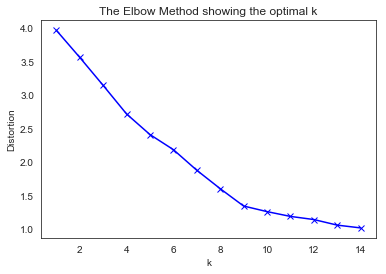

In [132]:
# Source:https://pythonprogramminglanguage.com/kmeans-elbow-method/
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# k means determine k
distortions = []

X=StandardScaler().fit_transform(df4.drop(['Region','Division'], axis=1))

K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method demonstrate that 9 is the optimal number of clusters. 

In [133]:
df4.drop(['Region','Division'],axis=1).columns

Index(['UnH_ratio', 'Combi_Indi', 'Year', 'Division_EastNorthCentral',
       'Division_EastSouthCentral', 'Division_MidAtlantic',
       'Division_Mountain', 'Division_NewEngland', 'Division_Pacific',
       'Division_SouthAtlantic', 'Division_WestNorthCentral',
       'Division_WestSouthCentral', 'Region_Midwest', 'Region_Northeast',
       'Region_South', 'Region_West'],
      dtype='object')

In [134]:
# Check the 9 cluster solution for the test and the training data set

X_train, X_test = train_test_split(X, test_size=0.4, random_state=42)

km = KMeans(n_clusters=9)

KM_train=km.fit_predict(X_train)
#train_labels=km.labels_
KM_test=km.predict(X_test)
#test_labels=km.labels_


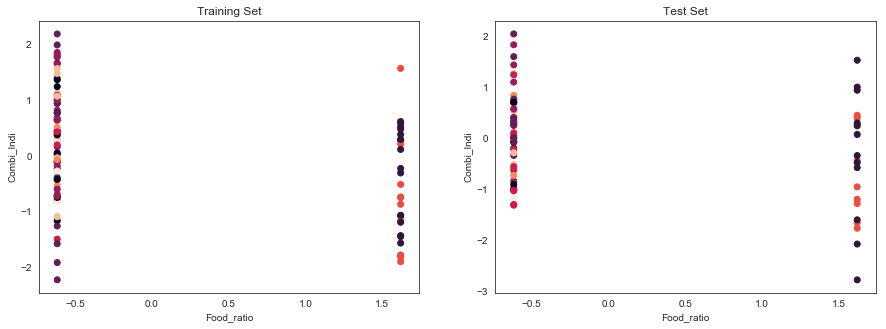

In [135]:
# plot the results of the KMeans Clustering using the first variables 
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_train[:, 15], X_train[:, 0], c=KM_train, label=train_labels)
plt.xlabel('Food_ratio')
plt.ylabel('Combi_Indi')
plt.title('Training Set')


plt.subplot(1,2,2)
plt.scatter(X_test[:, 15], X_test[:, 0], c=KM_test,label=test_labels)
plt.title('Test Set')
plt.xlabel('Food_ratio')
plt.ylabel('Combi_Indi')
#plt.legend()
plt.show()

The clusters returned by Kmeans, are all associated with the binary data from the regions and divisions. This is not very help full. What if we only use Comdi_Indi adn UhH_ratio.

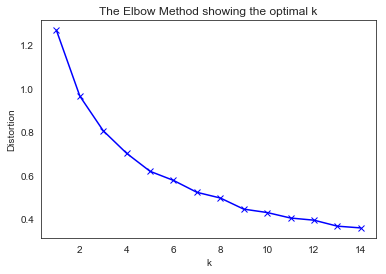

In [136]:
# Source:https://pythonprogramminglanguage.com/kmeans-elbow-method/
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# k means determine k
distortions = []

X=StandardScaler().fit_transform(df4[['Combi_Indi','UnH_ratio']])

K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [137]:
# Check the 9 cluster solution for the test and the training data set

X_train, X_test = train_test_split(X, test_size=0.4, random_state=42)

km = KMeans(n_clusters=5)

KM_train=km.fit_predict(X_train)
#train_labels=km.labels_
KM_test=km.predict(X_test)
#test_labels=km.labels_


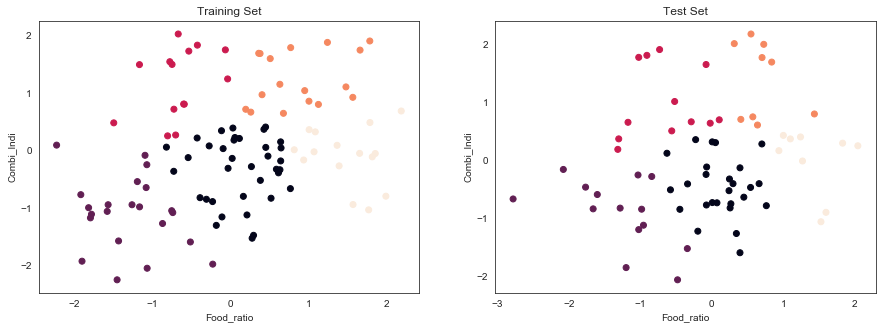

In [138]:
# plot the results of the KMeans Clustering using the first variables 
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_train[:, 1], X_train[:, 0], c=KM_train, label=KM_train)
plt.xlabel('Food_ratio')
plt.ylabel('Combi_Indi')
plt.title('Training Set')


plt.subplot(1,2,2)
plt.scatter(X_test[:, 1], X_test[:, 0], c=KM_test,label=KM_test)
plt.title('Test Set')
plt.xlabel('Food_ratio')
plt.ylabel('Combi_Indi')
#plt.legend(loc=9)
plt.show()

The clustering of my features of interest might be usefull for the modeling, as it indicates close points.

## Tweet counts, Combi_Health and regional data

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



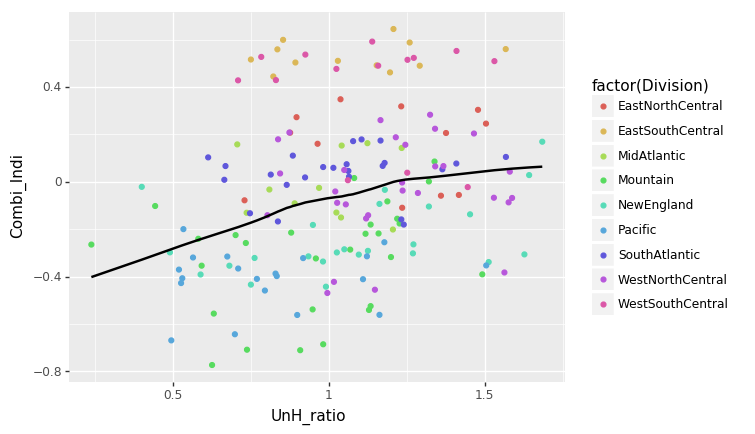

<ggplot: (95903722465)>

In [139]:
(ggplot(df4)
 + geom_point(aes(x='UnH_ratio', y='Combi_Indi', color='factor(Division)'))
 + geom_smooth(
        aes(x = 'UnH_ratio',
            y = 'Combi_Indi'))
)

In [140]:
Cast the Counts by division

SyntaxError: invalid syntax (<ipython-input-140-e8f9b562740b>, line 1)

In [156]:
df4.head()

,UnH_ratio,Combi_Indi,Year,Division_EastNorthCentral,Division_EastSouthCentral,Division_MidAtlantic,Division_Mountain,Division_NewEngland,Division_Pacific,Division_SouthAtlantic,Division_WestNorthCentral,Division_WestSouthCentral,Region_Midwest,Region_Northeast,Region_South,Region_West,Region,Division,State
0,0.852940,0.599171,2013,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
1,1.028597,0.510582,2014,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
2,0.834628,0.559005,2015,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
3,1.566837,0.560150,2016,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
4,0.768955,-0.409322,2013,0,0,0,0,0,1,0,0,0,0,0,0,1,West,Pacific,Alaska


In [183]:
df4['State']=data3['State']
seldf=df4[['Combi_Indi','Division','Year','State']]
seldf=seldf.pivot_table(index='Division',columns=['Year','State'],values='Combi_Indi')
seldf['Means']=np.nanmean(seldf,axis=1)
seldf=seldf.sort_values('Means',ascending=True)
seldf=seldf.reset_index()
seldf['NumDiv']=seldf.index.astype(str)+'_'+seldf.Division
# Fix the multi index coluons
mi=seldf.columns.tolist() 
ColNames = pd.Index([str(e[0]) +'_'+ str(e[1]) for e in mi])
print(ColNames)
seldf.columns=ColNames

# 

seldf=seldf.drop(['Means_','Division_'],axis=1)
MeltColumns=seldf.columns[0:seldf.shape[1]-1]
df_skinny=pd.melt(seldf,id_vars=['NumDiv_'],value_vars=MeltColumns)
print(df_skinny.shape)
df_skinny=df_skinny.dropna()
print(df_skinny.shape)
df_skinny=df_skinny.rename(columns={"value":"Combi_Indi","NumDiv_":"Division"})
df_skinny.head()

Index(['Division_', '2013_Alabama', '2013_Alaska', '2013_Arizona',
       '2013_Arkansas', '2013_California', '2013_Colorado', '2013_Connecticut',
       '2013_Delaware', '2013_Florida',
       ...
       '2016_Rhode Island', '2016_South Carolina', '2016_South Dakota',
       '2016_Tennessee', '2016_Texas', '2016_Utah', '2016_Vermont',
       '2016_Washington', 'Means_', 'NumDiv_'],
      dtype='object', length=177)
(1566, 3)
(174, 3)


,Division,variable,Combi_Indi
8,8_EastSouthCentral,2013_Alabama,0.599171
9,0_Pacific,2013_Alaska,-0.409322
19,1_Mountain,2013_Arizona,-0.257929
34,7_WestSouthCentral,2013_Arkansas,0.476592
36,0_Pacific,2013_California,-0.319091


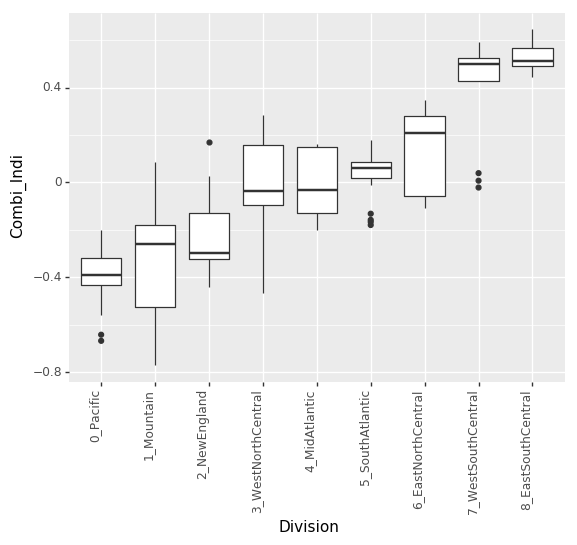

<ggplot: (-9223371940951053389)>

In [184]:
# Group the 

(ggplot(df_skinny)
 + geom_boxplot(aes(x='Division', y='Combi_Indi'))
 + geom_smooth(
        aes(x = 'Division',
            y = 'Combi_Indi'))
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
)

Index(['Division_', '2013_Alabama', '2013_Alaska', '2013_Arizona',
       '2013_Arkansas', '2013_California', '2013_Colorado', '2013_Connecticut',
       '2013_Delaware', '2013_Florida',
       ...
       '2016_Rhode Island', '2016_South Carolina', '2016_South Dakota',
       '2016_Tennessee', '2016_Texas', '2016_Utah', '2016_Vermont',
       '2016_Washington', 'Means_', 'NumDiv_'],
      dtype='object', length=177)
(1566, 3)
(174, 3)


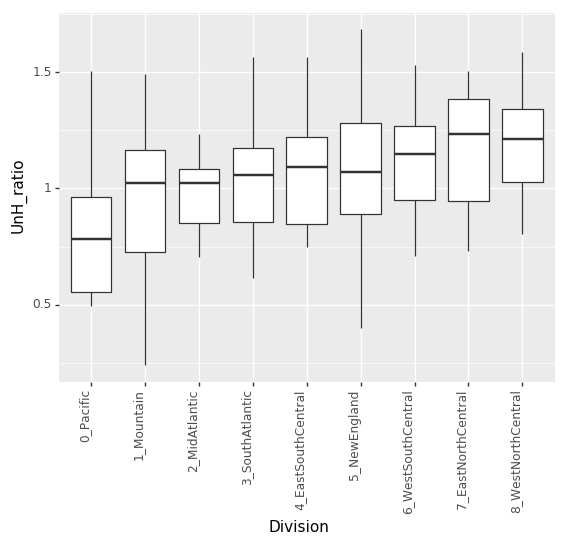

<ggplot: (95904006099)>

In [185]:
# Let's do the same plot now for the UnH_ratio
df4['State']=data3['State']
seldf=df4[['UnH_ratio','Division','Year','State']]
seldf=seldf.pivot_table(index='Division',columns=['Year','State'],values='UnH_ratio')
seldf['Means']=np.nanmean(seldf,axis=1)
seldf=seldf.sort_values('Means',ascending=True)
seldf=seldf.reset_index()
seldf['NumDiv']=seldf.index.astype(str)+'_'+seldf.Division
# Fix the multi index coluons
mi=seldf.columns.tolist() 
ColNames = pd.Index([str(e[0]) +'_'+ str(e[1]) for e in mi])
print(ColNames)
seldf.columns=ColNames

# 

seldf=seldf.drop(['Means_','Division_'],axis=1)
MeltColumns=seldf.columns[0:seldf.shape[1]-1]
df_skinny=pd.melt(seldf,id_vars=['NumDiv_'],value_vars=MeltColumns)
print(df_skinny.shape)
df_skinny=df_skinny.dropna()
print(df_skinny.shape)
df_skinny=df_skinny.rename(columns={"value":"UnH_ratio","NumDiv_":"Division"})
df_skinny.head()

(ggplot(df_skinny)
 + geom_boxplot(aes(x='Division', y='UnH_ratio'))
 + geom_smooth(
        aes(x = 'Division',
            y = 'UnH_ratio'))
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
)

# Feature engineering

In [186]:
df4.head()

,UnH_ratio,Combi_Indi,Year,Division_EastNorthCentral,Division_EastSouthCentral,Division_MidAtlantic,Division_Mountain,Division_NewEngland,Division_Pacific,Division_SouthAtlantic,Division_WestNorthCentral,Division_WestSouthCentral,Region_Midwest,Region_Northeast,Region_South,Region_West,Region,Division,State
0,0.852940,0.599171,2013,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
1,1.028597,0.510582,2014,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
2,0.834628,0.559005,2015,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
3,1.566837,0.560150,2016,0,1,0,0,0,0,0,0,0,0,0,1,0,South,EastSouthCentral,Alabama
4,0.768955,-0.409322,2013,0,0,0,0,0,1,0,0,0,0,0,0,1,West,Pacific,Alaska


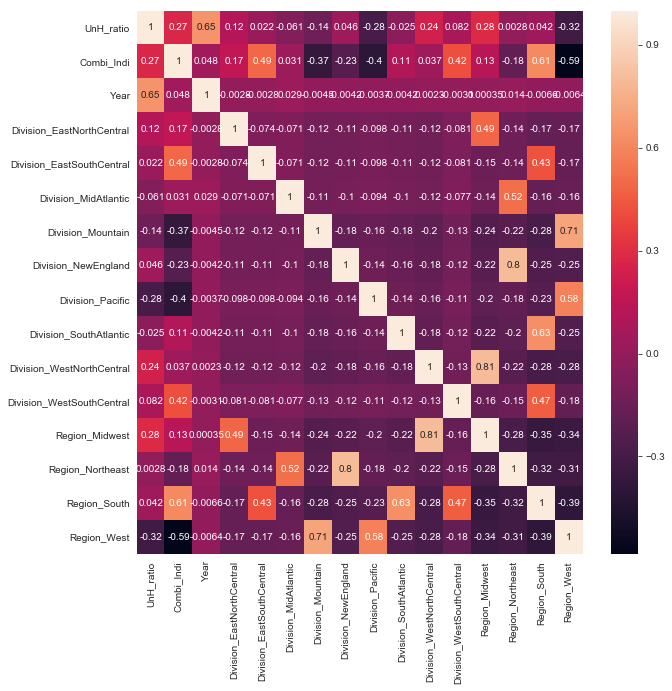

In [187]:
# Check for correlation again
CorrMa = df4.drop(['Region','Division','State'],axis=1).corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(CorrMa,annot=True)#[['norm_healthy_tweets','norm_unhealthy_tweets']])
plt.show()

The correlation plot clearly shows that most of the information is carried in the region. The features with the strongest correlation with the outcome (Combi_Indi) are: 'Region_South','Region_West', 'Division_EastSouthCentral','Division_Pacific','Division_Mountain' and on place six 'UnH_Ratio'. The regions and divisions show some correlation with each other.In order to further reduce this colinearity, I will now use pca.

Explained variance per component: [9.99999551e-01 1.10678278e-07 1.03080467e-07]
(174, 8)


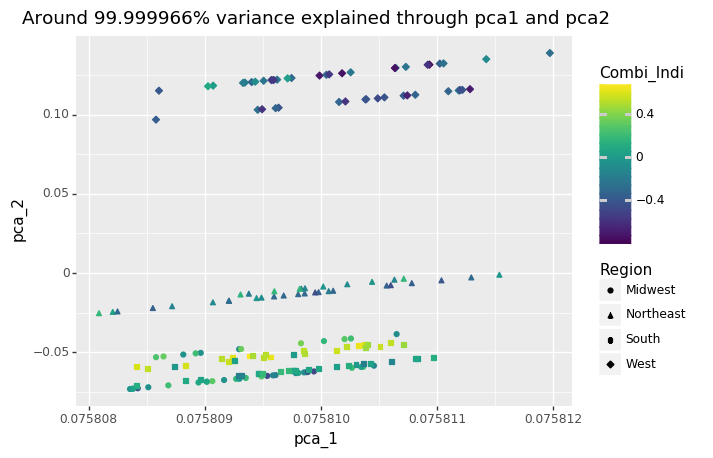

<ggplot: (-9223371940951188725)>

In [286]:
# PCA
# 1. Reset index of df4
df5= df4.reset_index()
# 1. normalize the data
NormData=normalize(df5.drop(['Combi_Indi','index','Division','Region','State'],axis=1))

pca = PCA(n_components=3,svd_solver = 'full')
pcas=pca.fit(NormData.T)

# Save the data into a df
pcas_df = pd.DataFrame(data=pca.components_.T)
print('Explained variance per component:',pca.explained_variance_ratio_[0:20])

# Add columns names
n_pcas=pcas_df.shape[1]

columnsN=[]
for i in range(n_pcas):
    columnsN.append('pca_'+str(i+1))


pcas_df.columns=columnsN
pcas_df['Region']=df5.Region
pcas_df['Division']=df5.Division
pcas_df['Year']=df5['Year']
pcas_df['Combi_Indi']=df5['Combi_Indi']
pcas_df['State']=df5['State']

print(pcas_df.shape)

# Plot the first two components
expVar12=round((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100,6)
Title='Around '+ str(expVar12) +'% variance explained through pca1 and pca2'
(ggplot(pcas_df)
 + geom_point(aes(x='pca_1', y='pca_2', color='Combi_Indi', shape='Region'))
 + labs(title=Title)
 #+ geom_label(data='State-Year')
)

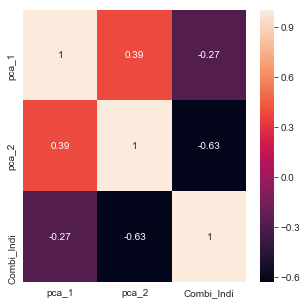

In [287]:
# Check for correlation again
CorrMa = pcas_df[['pca_1','pca_2','Combi_Indi']].corr(method='pearson')
plt.figure(figsize=(5,5))
sns.heatmap(CorrMa,annot=True)#[['norm_healthy_tweets','norm_unhealthy_tweets']])
plt.show()

pca_1 and pca_2 correlate with each other. Colinearity is not a problem for accuracy of prediction only for feature importance. As, the features are now combined in the components anyway, I will ignore the strong correlation between pca_1 and pca_2.

# Regression

The aim of this section is to predict Combi_Indi using the regional data and the UnH_ratio. 


## Defining the data for modeling

In [204]:
# Data for the models
X=pcas_df[['pca_1','pca_2']]
Y=pcas_df['Combi_Indi']

## Functions

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import time

def runRF_regression(input_df, target, no_folds):
    start_time=time.time()
    param_grid= {'n_estimators': [50,80,100,150,200],'max_depth':[3,5,7,10,20]} # Try different amounts of trees
    print('Random Forest')
    RF_regr = RandomForestRegressor(random_state=0)
    CV_model = GridSearchCV(estimator=RF_regr, param_grid=param_grid, cv= 5)
    
    CV_model.fit(input_df, target)
    cvs = cross_val_score(CV_model, input_df, target, cv=no_folds) 
    print("Best parameters:", CV_model.best_params_) 
    #print('Feature Importance:{}',rand_forest_class.feature_importances_)
       
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy RFC: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()

    return(cvs)

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [206]:
# produces a lot of warnings
# https://github.com/dmlc/xgboost/issues/4300
# this should fix it
#replace data.base with data.values.base
# but it does not run
import xgboost as xgb
from xgboost import XGBRegressor
def runXGB(input_df,target,no_folds):
    
    print('XGB')
    start_time=time.time()
    param_grid = {'n_estimators': [50,80,100,150,200],'max_depth':[3,5,7,10,20]}
    xgb= XGBRegressor() 
    CV_model = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
    CV_model.fit(input_df, target)
    cvs=cross_val_score(CV_model,input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_) 
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [207]:
from sklearn.neighbors import KNeighborsRegressor
def runKNN_regression(input_df, target,no_folds):
    start_time=time.time()
    param_grid= {'n_neighbors': [2,3,4,5]} # Number of Neighbors to take into consideration
    print('KNN')
    knn_regres = KNeighborsRegressor()
    CV_model = GridSearchCV(estimator=knn_regres, param_grid=param_grid, cv= 5)
    CV_model.fit(input_df, target)
    
    cvs = cross_val_score(CV_model, input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_)
    # cross validation
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy KNN with weights: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()

    return(cvs)

In [236]:
from sklearn.linear_model import LinearRegression

def runLin_regression(input_df,target,no_folds):
    start_time=time.time()

    linreg = LinearRegression()

    print('Linear regression')
      
    cvs = cross_val_score(linreg, input_df, target, cv=no_folds)
    print('\nCoefficients: \n', linreg.fit(input_df,target).coef_)
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()

    return(cvs)

In [209]:
from sklearn import linear_model

def runRidge_regression(input_df,target,no_folds):
    start_time=time.time()

    param_grid= {'alpha': [0.001,0.01,0.1,0.5,0.8,1,1.2,2,3,10,100,1000]} # Number of Neighbors to take into consideration
    ridge = linear_model.Ridge(random_state=0)

    print('Ridge regression')
      
    CV_model = GridSearchCV(estimator=ridge, param_grid=param_grid, cv= 5)
    CV_model.fit(input_df, target)
    
    cvs = cross_val_score(CV_model, input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_)
    print('\nCoefficients: \n', CV_model.best_estimator_.coef_)
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()

    return(cvs)

In [210]:
from sklearn import linear_model

def runLasso_regression(input_df,target,no_folds):
    start_time=time.time()

    param_grid= {'alpha': [0.8,1,1.35,1.4,1.45,1.5,1.6,1.7,2,3]} # Number of Neighbors to take into consideration
    lasso = linear_model.Lasso(random_state=0)

    print('Lasso regression')
      
    CV_model = GridSearchCV(estimator=lasso, param_grid=param_grid, cv= 5)
    CV_model.fit(input_df, target)
    
    cvs = cross_val_score(CV_model, input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_)
    print('\nCoefficients: \n', CV_model.best_estimator_.coef_)
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()

    return(cvs)

In [211]:
from sklearn.svm import SVR
def runSVM_regression(input_df,target,no_folds):
    print('Support Vector Regression')
    start_time=time.time()
    param_grid = {'C':[0.0001,0.001, 0.01, 0.1, 1, 10, 20, 1e2, 1e3,1500,1e4 ]}
    svm = SVR(kernel = 'rbf') 
    CV_model = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
    CV_model.fit(input_df, target)
    cvs=cross_val_score(CV_model,input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_) 
    print('Time taken: {} seconds.'.format('%.3f' % (time.time() - start_time)))
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [212]:
from sklearn.linear_model import RANSACRegressor
def runRANSAC(input_df,target,no_folds):
    # We'll make 500 iterations, use 3-deep trees, and set our loss function.
    # Initialize and fit the model.
    print('RANSAC')
    RS = RANSACRegressor()
    cvs=cross_val_score(RS,input_df,target, cv=no_folds)
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [213]:
from sklearn.ensemble import AdaBoostRegressor
def runAdaBoostRF(input_df,target,no_folds):
    print('AdaBoost RandomForest')
    rng = np.random.RandomState(1)
    Ada = AdaBoostRegressor(RandomForestRegressor(max_depth=5, random_state=0),
                          n_estimators=200, random_state=rng)
    
    cvs=cross_val_score(Ada,input_df,target, cv=no_folds)
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [214]:
from sklearn.ensemble import AdaBoostRegressor
def runAdaBoostSVM(input_df,target,no_folds):
    print('AdaBoost SVM')
    rng = np.random.RandomState(1)
    Ada = AdaBoostRegressor(SVR(kernel = 'rbf',C= 10) ,
                          n_estimators=300, random_state=rng)
    cvs=cross_val_score(Ada,input_df,target, cv=no_folds)
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [215]:
from sklearn.ensemble import AdaBoostRegressor
def runAdaBoostRidge(input_df,target,no_folds):
    print('AdaBoost Ridge')
    rng = np.random.RandomState(1)
  
    Ada = AdaBoostRegressor(linear_model.Ridge(random_state=0, alpha=0.5),
                          n_estimators=300, random_state=rng)
    cvs=cross_val_score(Ada,input_df,target, cv=no_folds)
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [216]:
from sklearn.ensemble import AdaBoostRegressor
def runAdaBoostKNN(input_df,target,no_folds):
    print('AdaBoost KNN')
    rng = np.random.RandomState(1)
  
    Ada = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=4),
                          n_estimators=300, random_state=rng)
    cvs=cross_val_score(Ada,input_df,target, cv=no_folds)
    print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    print()
    return(cvs)

In [254]:
from sklearn.neural_network import MLPRegressor
def runMLP(input_df,target,no_folds):
    param_grid = {'hidden_layer_sizes':[[8,124,4,1],[8,124,124,124,124,4,1],[8,576,1024,4,1], [8,576,1], [8,576], [576,100,16,1]],
                 'activation':['identity','logistic','tanh','relu'],
                 'max_iter':[300,500,1000]} 
    start_time= time.time()
    print('Multi layer perceptron')
    mlp = MLPRegressor(solver='adam')# adam is supposed to be good for small datasets
    CV_model = GridSearchCV(estimator=mlp, param_grid=param_grid, cv= 2)
    CV_model.fit(input_df, target)
    cvs=cross_val_score(CV_model,input_df, target, cv=no_folds)
    print("Best parameters:", CV_model.best_params_)
    print('Time taken: {} minutes.'.format('%.3f' % (time.time() - start_time
    )))
    print('Average accuracy RFC: {}'.format('%.3f' % cvs.mean()))
    print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))
    runtime=time.time() - start_time
    print()
    return(cvs)

## Two principal components and Year

In [217]:
cvs_KNN= runKNN_regression(X, Y, 4)

KNN
Best parameters: {'n_neighbors': 5}
Time taken: 0.539 seconds.
Average accuracy KNN with weights: 0.279
Standard deviation of accuracy: 0.521



In [218]:
cvs_lin= runLin_regression(X, Y, 4)

Linear regression
Time taken: 0.032 seconds.
Average accuracy: 0.061
Standard deviation of accuracy: 0.729



In [219]:
cvs_ridge= runRidge_regression(X, Y, 4)

Ridge regression
Best parameters: {'alpha': 0.1}

Coefficients: 
 [-2.25325144e-05 -2.41422693e+00]
Time taken: 1.137 seconds.
Average accuracy: -0.050
Standard deviation of accuracy: 0.639



In [220]:
cvs_lasso= runLasso_regression(X, Y,4)

Lasso regression
Best parameters: {'alpha': 0.8}

Coefficients: 
 [-0. -0.]
Time taken: 0.890 seconds.
Average accuracy: -0.069
Standard deviation of accuracy: 0.084



In [221]:
cvs_RFR= runRF_regression(X, Y, 4)

Random Forest
Best parameters: {'max_depth': 5, 'n_estimators': 80}
Time taken: 101.397 seconds.
Average accuracy RFC: 0.314
Standard deviation of accuracy: 0.383



In [222]:
cvs_SVM= runSVM_regression(X, Y, 4)

Support Vector Regression
Best parameters: {'C': 1}
Time taken: 1.290 seconds.
Average accuracy: 0.022
Standard deviation of accuracy: 0.536



In [223]:
cvs_RS= runRANSAC(X, Y, 4)

RANSAC
Average accuracy: 0.127
Standard deviation of accuracy: 0.457



In [224]:
cvs_Ada_RF= runAdaBoostRF(X, Y, 4)

AdaBoost RandomForest
Average accuracy: 0.325
Standard deviation of accuracy: 0.415



In [225]:
cvs_Ada_SVR= runAdaBoostSVM(X, Y, 4)

AdaBoost SVM
Average accuracy: 0.126
Standard deviation of accuracy: 0.572



In [226]:
cvs_Ada_Ridge=runAdaBoostRidge(X,Y,4)
cvs_Ada_KNN=runAdaBoostKNN(X,Y,4)

AdaBoost Ridge
Average accuracy: 0.166
Standard deviation of accuracy: 0.340

AdaBoost KNN
Average accuracy: 0.149
Standard deviation of accuracy: 0.537



In [227]:
cvs_XGB=runXGB(X,Y,4)

XGB


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

Best parameters: {'max_depth': 3, 'n_estimators': 50}
Time taken: 23.164 seconds.
Average accuracy: 0.339
Standard deviation of accuracy: 0.382



C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



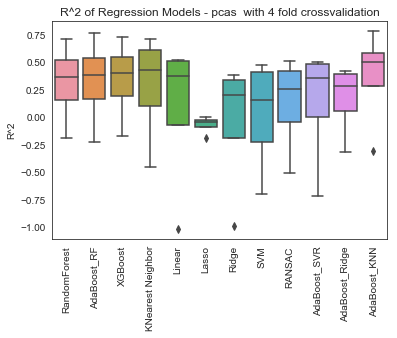

In [242]:
# Plot the results
Scores = {'RandomForest': cvs_RFR,
          'AdaBoost_RF':cvs_Ada_RF,
          'XGBoost':cvs_XGB,
          'KNearest Neighbor':cvs_KNN, 
          'Linear':cvs_lin,
          'Lasso':cvs_lasso,
          'Ridge':cvs_ridge,
          'SVM':cvs_SVM,
         'RANSAC':cvs_RS,
         
         'AdaBoost_SVR':cvs_Ada_SVR,
         'AdaBoost_Ridge':cvs_Ada_Ridge,
         'AdaBoost_KNN':cvs_Ada_KNN}
Scoreresults = pd.DataFrame(data=Scores, index=(range(4)))

# Make a boxplot for comparison
f, ax = plt.subplots(ncols=1, nrows=1, sharex=True)
#fig.set_size_inches(5,5)

ax = sns.boxplot(data=Scoreresults[Scoreresults.columns], ax=ax)

plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title('R^2 of Regression Models - pcas  with 4 fold crossvalidation')
ax.set_ylabel('R^2')

plt.subplots_adjust(wspace=0, hspace=0)

## Using hand selected features

In [230]:
# Handselected features for the models
# Normalize the data before the input

X2=StandardScaler().fit_transform(df5[['UnH_ratio','Region_South','Region_West','Division_EastSouthCentral','Division_Mountain',
                                       'Division_Pacific','Division_WestSouthCentral','Division_NewEngland']])
Y2=df5['Combi_Indi']

In [240]:
cvs_KNN2= runKNN_regression(X2, Y2, 4)
cvs_lin2= runLin_regression(X2, Y2, 4)
cvs_ridge2= runRidge_regression(X2, Y2, 4)
cvs_lasso2= runLasso_regression(X2, Y2,4)
cvs_RFR2= runRF_regression(X2, Y2, 4)
cvs_SVM2= runSVM_regression(X2, Y2,4)
cvs_RS2= runRANSAC(X2, Y2, 4)
cvs_Ada_RF2= runAdaBoostRF(X2, Y2, 4)
cvs_Ada_SVM2= runAdaBoostSVM(X2, Y2, 4)
cvs_Ada_Ridge2=runAdaBoostRidge(X2,Y2,4)
cvs_Ada_KNN=runAdaBoostKNN(X2,Y2,4)
cvs_XGB2=runXGB(X2,Y2,4)


KNN
Best parameters: {'n_neighbors': 3}
Time taken: 0.310 seconds.
Average accuracy KNN with weights: 0.384
Standard deviation of accuracy: 0.577

Linear regression

Coefficients: 
 [ 0.02845792  0.01383414 -0.08465275  0.12438328 -0.04694037 -0.06454499
  0.09650875 -0.08474061]
Time taken: 0.016 seconds.
Average accuracy: 0.396
Standard deviation of accuracy: 0.636

Ridge regression
Best parameters: {'alpha': 10}

Coefficients: 
 [ 0.02960041  0.02614825 -0.08022323  0.1139423  -0.04456714 -0.06107205
  0.08717807 -0.07744515]
Time taken: 0.551 seconds.
Average accuracy: 0.368
Standard deviation of accuracy: 0.533

Lasso regression
Best parameters: {'alpha': 0.8}

Coefficients: 
 [ 0.  0. -0.  0. -0. -0.  0. -0.]
Time taken: 0.513 seconds.
Average accuracy: -0.069
Standard deviation of accuracy: 0.084

Random Forest
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Time taken: 102.246 seconds.
Average accuracy RFC: 0.400
Standard deviation of accuracy: 0.548

Support Vector Regre

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Ser

Best parameters: {'max_depth': 3, 'n_estimators': 50}
Time taken: 29.712 seconds.
Average accuracy: 0.435
Standard deviation of accuracy: 0.459



C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [255]:
cvs_MLP2=runMLP(X2,Y2,4)

Multi layer perceptron


C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarn

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWar

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWar

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': [8, 576], 'max_iter': 300}
Time taken: 1665.212 minutes.
Average accuracy RFC: 0.100
Standard deviation of accuracy: 0.824



In [ ]:
#https://stackoverflow.com/questions/46028914/multilayer-perceptron-convergencewarning-stochastic-optimizer-maximum-iterat


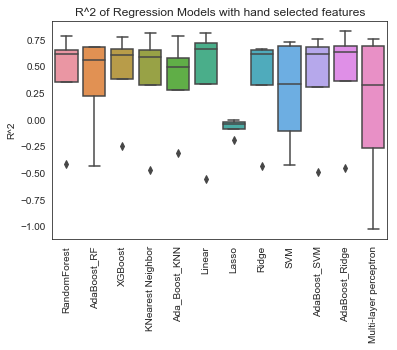

In [289]:
# Plot the results
Scores = {'RandomForest': cvs_RFR2,
          'AdaBoost_RF':cvs_Ada_RF2,
          'XGBoost':cvs_XGB2,
          'KNearest Neighbor':cvs_KNN2, 
          'Ada_Boost_KNN':cvs_Ada_KNN,
          'Linear':cvs_lin2,
          'Lasso':cvs_lasso2,
          'Ridge':cvs_ridge2,
          'SVM':cvs_SVM2,          
          #'RANSAC':cvs_RS2,
          
          'AdaBoost_SVM':cvs_Ada_SVM2,
          'AdaBoost_Ridge':cvs_Ada_Ridge2,
          'Multi-layer perceptron':cvs_MLP

         }
Scoreresults = pd.DataFrame(data=Scores, index=(range(4)))

# Make a boxplot for comparison
f, ax = plt.subplots(ncols=1, nrows=1, sharex=True)

ax = sns.boxplot(data=Scoreresults[Scoreresults.columns], ax=ax)

plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title('R^2 of Regression Models with hand selected features')
ax.set_ylabel('R^2')

plt.subplots_adjust(wspace=0, hspace=0)

The modeling based only on the principal components and the modeling with the hand selected features looks not great. Very noisy. 

# Neural Nets

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Data for the models
X2=StandardScaler().fit_transform(df4[['Food_ratio','Division_EastSouthCentral','Division_Mountain',
                                       'Division_Pacific','Division_WestSouthCentral','Division_NewEngland',
                                       'Region_South','Region_West','Year']])
Y2=df4['Combi_Health']

In [ ]:
# Inspired by https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# fix random seed for reproducibility
seed = 11
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=4, random_state=seed)
cvs = cross_val_score(estimator, X2, Y2, cv=kfold)
print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=4, random_state=seed)
cvs = cross_val_score(pipeline, X2, Y2, cv=kfold)
print('Deep Net')
print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))

In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=4, random_state=seed)
cvs = cross_val_score(pipeline, X2, Y2, cv=kfold)
print('Wide Net')
print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))

In [ ]:
def deep_wide_model():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_wide_model, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=4, random_state=seed)
cvs = cross_val_score(pipeline, X2, Y2, cv=kfold)
print('Deep Wide Net')
print('Average accuracy: {}'.format('%.3f' % cvs.mean()))
print('Standard deviation of accuracy: {}'.format('%.3f' % np.std(cvs, ddof=1)))